<a href="https://colab.research.google.com/github/annguyen32/Market_Anomaly_Detection/blob/main/Market_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs



In [ ]:
df= pd.read_csv('FinancialMarketData.csv')

In [ ]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,EURUSDV3M Index,NaN,NaN,"Fixed Income, MM & Interbank",NaN,NaN,NaN,NaN,NaN,NaN,...,Treasury,Gold,Brent,S&P,Eurostoxx,Nasdaq,EM,Japan,2Y Ger,2Y US
1,NaN,NaN,Show/Hide data,S,H,H,H,H,H,H,...,H,H,H,H,H,H,H,H,H,H
2,676,NaN,Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Index Currency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Ticker,XAU BGNL Curncy,ECSURPUS Index,BDIY Index,CRY Index,DXY Curncy,JPY Curncy,GBP Curncy,...,TY1 Comdty,GC1 Comdty,CO1 Comdty,ES1 Index,VG1 Index,NQ1 Index,LLL1 Index,TP1 Index,DU1 Comdty,TU2 Comdty
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,NaN,NaN,3/23/2021,1727.960,0.339,2271.000,184.502,92.336,108.720,1.376,...,131.922,1725.100,60.790,3899.800,3773.000,13006.250,1103.600,1958.500,112.140,110.383
1150,NaN,NaN,3/30/2021,1685.560,0.303,2103.000,184.874,93.297,110.290,1.372,...,131.188,1683.900,64.140,3947.700,3872.000,12878.250,1103.600,1978.000,112.090,110.387
1151,NaN,NaN,4/6/2021,1743.280,0.440,2092.000,185.839,92.335,109.880,1.382,...,131.688,1741.500,62.740,4064.000,3920.000,13570.000,1103.600,1955.000,112.120,110.281
1152,NaN,NaN,4/13/2021,1742.690,0.467,2140.000,188.137,91.852,109.190,1.374,...,132.078,1746.200,63.670,4132.800,3917.000,13975.750,1103.600,1961.500,112.115,110.293


In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
count,10,8,1152,1152,1113,1150,1150,1150,1150,1150,...,1151,1151,1151,1151,1151,1143,708,1151,1151,1151
unique,10,8,1152,1129,749,961,1133,1112,997,560,...,908,1092,1090,1053,889,1087,193,893,781,707
top,EURUSDV3M Index,ED-22AY,Show/Hide data,318.550,-0.174,1759.000,194.180,100.230,109.460,1.570,...,111.375,273.400,72.460,1113.500,3455.000,1570.000,1103.600,1642.000,112.300,99.648
freq,1,1,1,3,5,4,2,3,5,8,...,4,3,3,3,5,4,514,5,6,60


In [ ]:
n_samples = 300
X, y = make_blobs(n_samples=n_samples, centers=2, random_state=42, cluster_std=1.0)
anomalies = np.array([[5, 5], [6, 6], [7, 7]])

In [ ]:
X = np.vstack([X, anomalies])

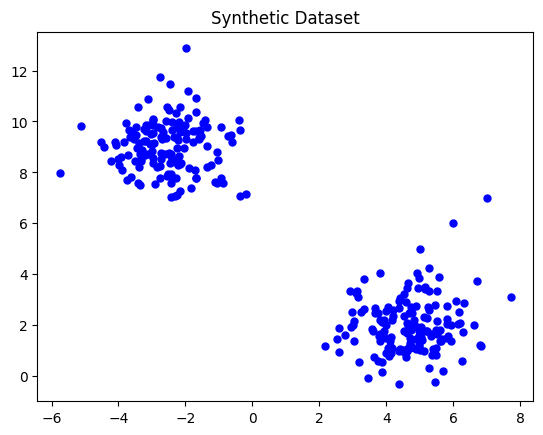

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.title("Synthetic Dataset")
plt.show()

In [ ]:
# Apply DBSCAN for anomaly detection with increased epsilon
dbscan = DBSCAN(eps=1, min_samples=41)  # Increase eps
labels = dbscan.fit_predict(X)

# Anomalies are considered as points with label -1
anomalies = X[labels == -1]

In [ ]:
anomalies = X[labels == -1]


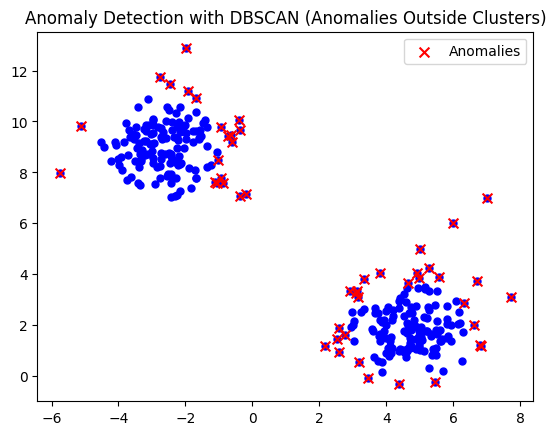

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', s=25)
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='r', marker='x', s=50, label='Anomalies')
plt.title("Anomaly Detection with DBSCAN (Anomalies Outside Clusters)")
plt.legend()
plt.show()

In [ ]:
print("Identified Anomalies:")
print(anomalies)

Identified Anomalies:
[[ 4.92965369  4.04857048]
 [ 3.10576467  3.25084651]
 [ 4.98163481  3.84934052]
 [-0.64342311  9.48811905]
 [-0.36525353  9.64820515]
 [-1.10640331  7.61243507]
 [ 6.79306129  1.20582212]
 [-1.92234053 11.20474175]
 [ 6.60460397  2.00843324]
 [ 2.51598311  1.44741466]
 [-0.62301172  9.18886394]
 [ 3.16129259  3.11692373]
 [ 4.65829722  3.649607  ]
 [-0.92318081  7.77647063]
 [ 4.36482714 -0.32875148]
 [ 3.31964563  3.80462845]
 [ 5.2726607   4.24386254]
 [-0.19453906  7.14702094]
 [-1.03130358  8.49601591]
 [ 2.92674431  3.32704206]
 [ 3.82165815  4.06555696]
 [ 5.56605638  3.88258632]
 [-5.75046496  7.98989849]
 [ 6.82968177  1.1648714 ]
 [-0.92998481  9.78172086]
 [-1.68713746 10.91107911]
 [-5.12894273  9.83618863]
 [-0.38704143 10.04675139]
 [ 3.19179449  0.56570591]
 [ 2.16823434  1.17627443]
 [ 6.70062676  3.72851053]
 [-1.99414994 12.86701762]
 [-0.87678632  7.58414475]
 [ 7.71875964  3.0927446 ]
 [-0.74374338  9.41926784]
 [ 2.57243674  1.88404964]
 [ 3.1